본 과제는 통신사 고객 데이터를 활용해 어떤 고객이 이탈하는지를 데이터 기반으로 분석하고, 이탈 가능 고객을 사전에 예측하여 실질적으로 활용 가능한 고객 유지 전략을 도출하는 것을 목표로 한다.

이를 위해 먼저 탐색적 데이터 분석(EDA)을 통해 고객의 계약 유형, 서비스 이용 형태, 요금 수준 등 다양한 특성과 이탈 간의 관계를 살펴보고, 이를 바탕으로 초기 가설을 수립, 예측 모델을 구축하여 이탈 가능성을 정량적으로 예측하고, 모델 결과를 해석함으로써 이탈에 영향을 미치는 핵심 요인을 도출하고자 한다.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/데이터분석/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path)

print(df.shape)
df.head()


(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df.shape


(7043, 21)

In [ ]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# TotalCharges 숫자 변환
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0)

# 타겟 변수 이진화
df["ChurnFlag"] = (df["Churn"] == "Yes").astype(int)

# 전체 이탈률 확인
df["ChurnFlag"].mean()


np.float64(0.2653698707936959)

전체 고객 중 약 26.5%가 이탈 고객임 → 클래스 불균형 문제 존재

In [ ]:
churn_contract = df.groupby("Contract")["ChurnFlag"].mean().sort_values(ascending=False)
churn_contract


,ChurnFlag
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


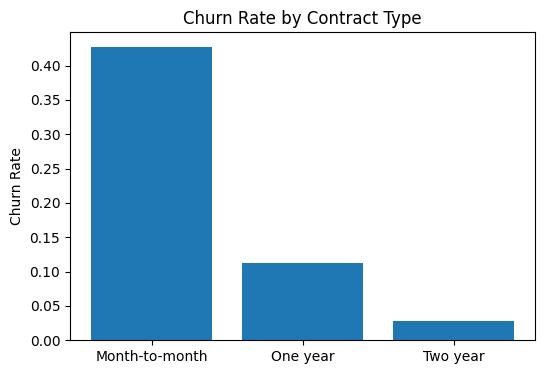

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(churn_contract.index, churn_contract.values)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()


In [ ]:
churn_internet = df.groupby("InternetService")["ChurnFlag"].mean().sort_values(ascending=False)
churn_internet


,ChurnFlag
InternetService,
Fiber optic,0.418928
DSL,0.189591
No,0.074050


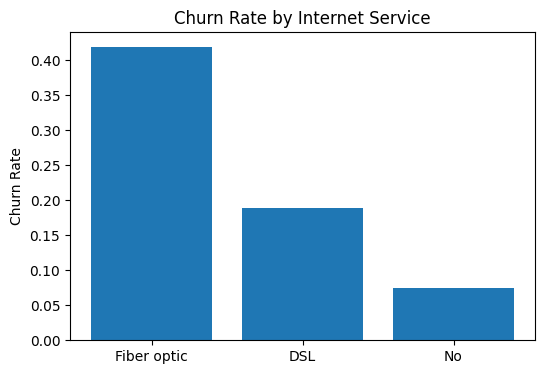

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(churn_internet.index, churn_internet.values)
plt.title("Churn Rate by Internet Service")
plt.ylabel("Churn Rate")
plt.show()


Month-to-month 계약 고객의 이탈률이 가장 높음

Fiber optic 서비스 이용 고객의 이탈률이 높게 나타남

In [ ]:
df.groupby("Churn")[["tenure","MonthlyCharges"]].mean()


,tenure,MonthlyCharges
Churn,,
No,37.569965,61.265124
Yes,17.979133,74.441332


/tmp/ipython-input-501340090.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


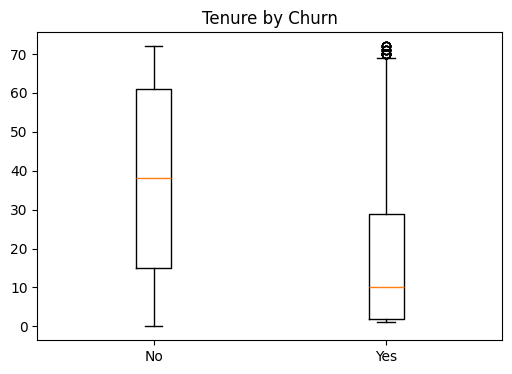

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(
    [df[df["Churn"]=="No"]["tenure"], df[df["Churn"]=="Yes"]["tenure"]],
    labels=["No","Yes"]
)
plt.title("Tenure by Churn")
plt.show()


/tmp/ipython-input-1978117523.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


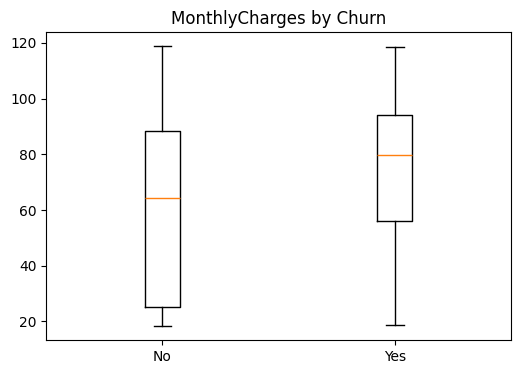

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(
    [df[df["Churn"]=="No"]["MonthlyCharges"], df[df["Churn"]=="Yes"]["MonthlyCharges"]],
    labels=["No","Yes"]
)
plt.title("MonthlyCharges by Churn")
plt.show()


이탈 고객은 가입기간이 짧고

월 요금이 상대적으로 높음

가설
*   1. Month-to-month 계약 고객은 장기 계약 고객보다 이탈할 확률이 높을 것이다.
*   2. Fiber optic 인터넷 서비스를 사용하는 고객은 DSL 또는 인터넷 미사용고객보다 이탈 확률이 높을 것이다.
*   3. 가입 기간(tenure)이 짧을수록 이탈 가능성이 높을 것이다.





본 프로젝트는 이탈 고객을 정확히 식별하여 선제적 대응이 목적이므로,
단순 정확도(Accuracy)보다 이탈 고객 예측 성능을 종합적으로 평가할 수 있는
ROC-AUC를 핵심 지표로 선정하였다


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [ ]:
X = df.drop(columns=["customerID","Churn","ChurnFlag"])
y = df["ChurnFlag"]

num_cols = ["tenure","MonthlyCharges","TotalCharges"]
cat_cols = [c for c in X.columns if c not in num_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight="balanced_subsample")
}

results = []
fitted = {}

for name, model in models.items():
    pipe = Pipeline([
        ("prep", preprocess),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    fitted[name] = pipe

    proba = pipe.predict_proba(X_test)[:,1]
    pred = (proba >= 0.5).astype(int)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, pred),
        "F1": f1_score(y_test, pred),
        "ROC_AUC": roc_auc_score(y_test, proba)
    })

result_df = pd.DataFrame(results)
result_df


,Model,Accuracy,F1,ROC_AUC
0,Logistic Regression,0.738112,0.613613,0.841502
1,Decision Tree,0.754436,0.620614,0.831799
2,Random Forest,0.779986,0.534535,0.821166


In [ ]:
best_model = fitted["Logistic Regression"]

ohe = best_model.named_steps["prep"].named_transformers_["cat"].named_steps["onehot"]
cat_names = ohe.get_feature_names_out(cat_cols)

feature_names = np.concatenate([num_cols, cat_names])
coefs = best_model.named_steps["model"].coef_.ravel()

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coefs,
    "abs_coef": np.abs(coefs)
}).sort_values("abs_coef", ascending=False)

top5 = coef_df.head(5)
top5


,feature,coef,abs_coef
0,tenure,-1.141091,1.141091
39,Contract_Two year,-0.766446,0.766446
17,InternetService_Fiber optic,0.715756,0.715756
1,MonthlyCharges,-0.677256,0.677256
37,Contract_Month-to-month,0.662997,0.662997


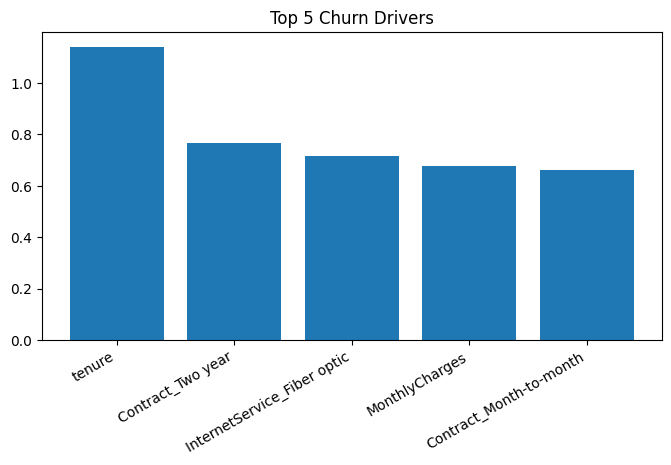

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(top5["feature"], top5["abs_coef"])
plt.title("Top 5 Churn Drivers")
plt.xticks(rotation=30, ha="right")
plt.show()


핵심 인사이트

가입 기간이 짧은 신규 고객일수록 이탈 위험이 높음

Month-to-month 계약은 구조적으로 이탈 위험이 큼

Fiber optic 서비스는 품질 또는 가격 민감도가 높을 가능성

전략 1. 신규 고객(0~3개월) 집중 온보딩 프로그램 운영
→ 초기 품질/청구/사용 불만을 빠르게 해결

전략 2. Month-to-month 고객 대상 장기 계약 전환 인센티브 제공
→ 할인, 번들 서비스, 추가 혜택 제공

본 프로젝트를 통해 통신사 고객 이탈은 우연히 발생하는 현상이 아니라, 계약 구조, 가입 기간, 서비스 유형, 요금 부담과 같은 명확한 요인에 의해 설명될 수 있음을 확인하였다.
EDA 결과와 예측 모델 분석 모두에서, 가입 기간이 짧고(Month-to-month), 요금 부담이 높은 고객군이 특히 이탈 위험이 높다는 일관된 패턴이 나타났다.

예측 모델 비교 결과, 로지스틱 회귀 모델은 높은 설명력과 안정적인 성능을 보이며 최종 모델로 선정되었다. 이 모델은 단순히 “이탈한다/하지 않는다”를 판단하는 데 그치지 않고, 각 고객의 이탈 가능성을 점수화함으로써 우선적으로 관리해야 할 고객을 선별하는 도구로 활용할 수 있다는 점에서 의미가 있다.

이번 분석을 통해 데이터 분석에서 중요한 점은 단순한 수치 개선이 아니라, 분석 결과를 비즈니스 언어로 해석하고 실행 전략으로 연결하는 과정임을 다시 한 번 인식하게 되었다. 높은 예측 정확도보다도, 왜 그런 결과가 나왔는지를 이해하고 이를 통해 조직이 취할 수 있는 행동을 제안하는 것이 데이터 분석가의 핵심 역할임을 체감하였다.